In [70]:
import   torch
from torch import nn  ## this contain building blocks for computational graphs
import matplotlib.pyplot as plt

### pyTORCH end to end workflow
1)prepare the data<br>
2)building the model<br>
3)training<br>
4)making prediction and evaluating the model<br>
5)saving and loading the model<br>
6)putting it all together<br>

In [71]:
## preparing the data
##data can be anything
##images
##excel sheet
##videos
##dna 
##etc

In [72]:
weights = 0.8 
bias = 0.4
x = torch.arange(0,1,0.02).unsqueeze(1)     ##inputs to the model
y = weights * x + bias                       ##correct output of the inputs
print(x)                                       ##supervised learning
print(y)
print(len(x))
print(len(y))

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])
tensor([[0.4000],
        [0.4160],
        [0.4320],
        [0.4480],
        [0.4640],
        [

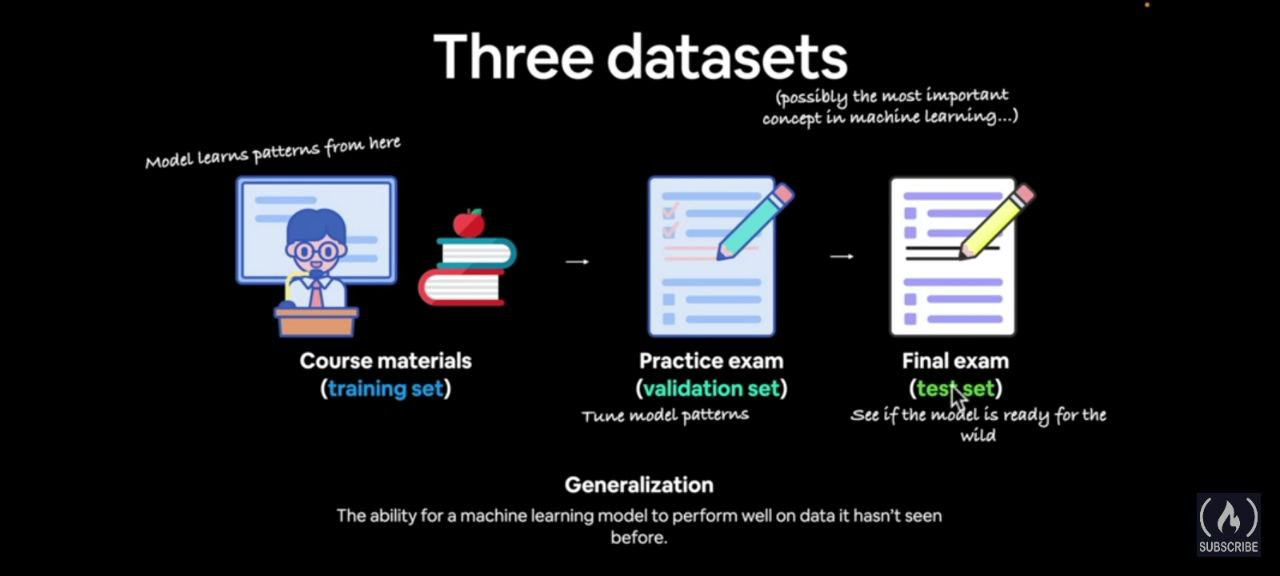

In [73]:
## slitting the data into train and test
split = int(0.8 * len(x))
train_x  = x[:split]
train_y = y[:split]
test_x = x[split:]
test_y = y[split:]
len(train_x),len(train_y),len(test_x),len(test_y)


(40, 40, 10, 10)

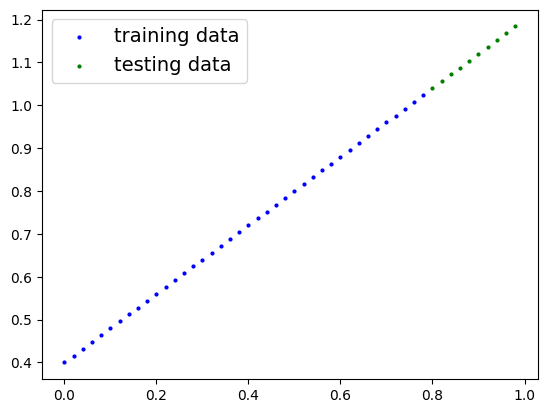

In [74]:
### lets visualise the data
def visualise_data(train_set=train_x,train_labels=train_y,test_set=test_x,test_labels=test_y,predictions=None):
  
  plt.scatter(train_x,train_labels,c='b',s=4,label="training data")
  plt.scatter(test_set,test_labels,c='g',s=4,label="testing data")
  if predictions is not None:
   plt.scatter(predictions,test_labels,c='r',s=4,label="predictions")
  plt.legend(prop={"size":14}) 

visualise_data()

In [75]:
### building our first pytorch model
### create a linear regression model class
### every MODEL(CLASS) in pytorch inherits from nn.module it has all built tools
### OOPS IT IS!!
from torch import nn
class LinearRegressionModel(nn.Module):
  def __init__(self):                    ## IT IS A CONSTRUCTOR
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

    ## forward method
  def forward(self,x:torch.Tensor) -> torch.tensor:  ## x is the training data
    return self.weights * x + self.bias  

    ''' 

    what our model does
    IT STARTS WITH SOME RANDOM VALUES OF PARAMETERS ,IN OUR CASE THE PARAMETERS
    ARE WEIGHTS AND BIAS THAT DEFINES OUR CURVE WE ARE TRYING TO IMITATE.
    IT THEN LEARNS AND ADJUST THE PARAMETERS AND WE HAVE A MODEL THAT REPRESENTS ALMOST OR EXACT(IF THE TRAINING IS EXCELLENT)
    THE SAME CURVE WE ARE TRAINING WITH.
    THEN WITH THOSE PARAMETERS OR I LOVE TO USE WEIGHTS WE MAKE PREDICTIONS........
    how does it do so ->
    there are two algorithm for that
    a)GRADIENT DESCENT
    b)BACKPROPAGATION
    '''
             
     




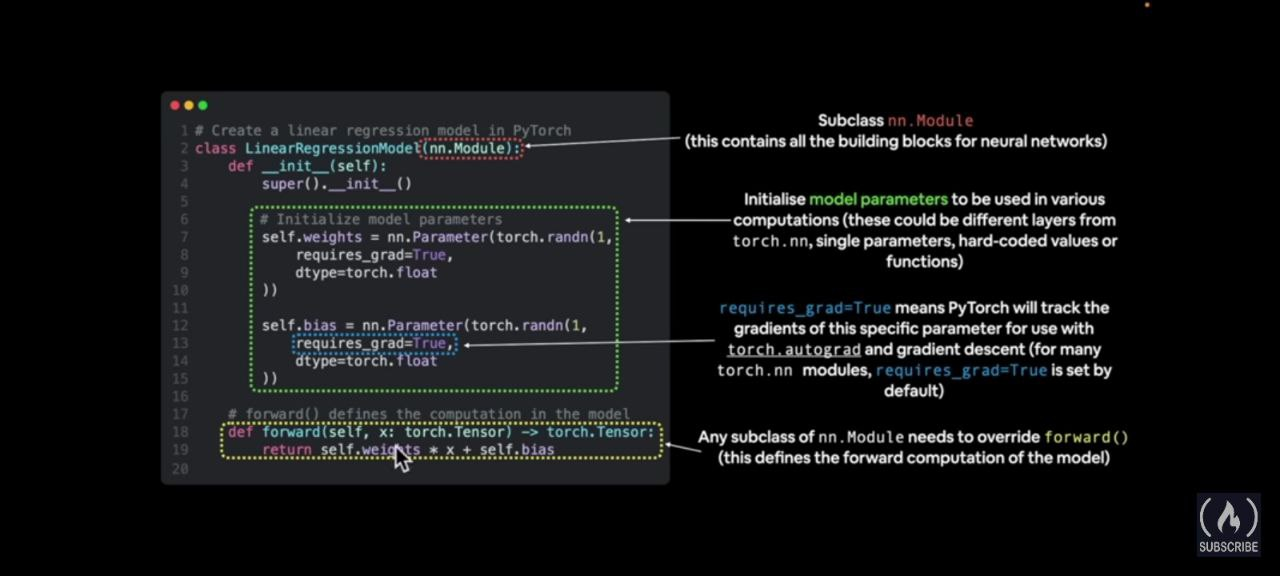

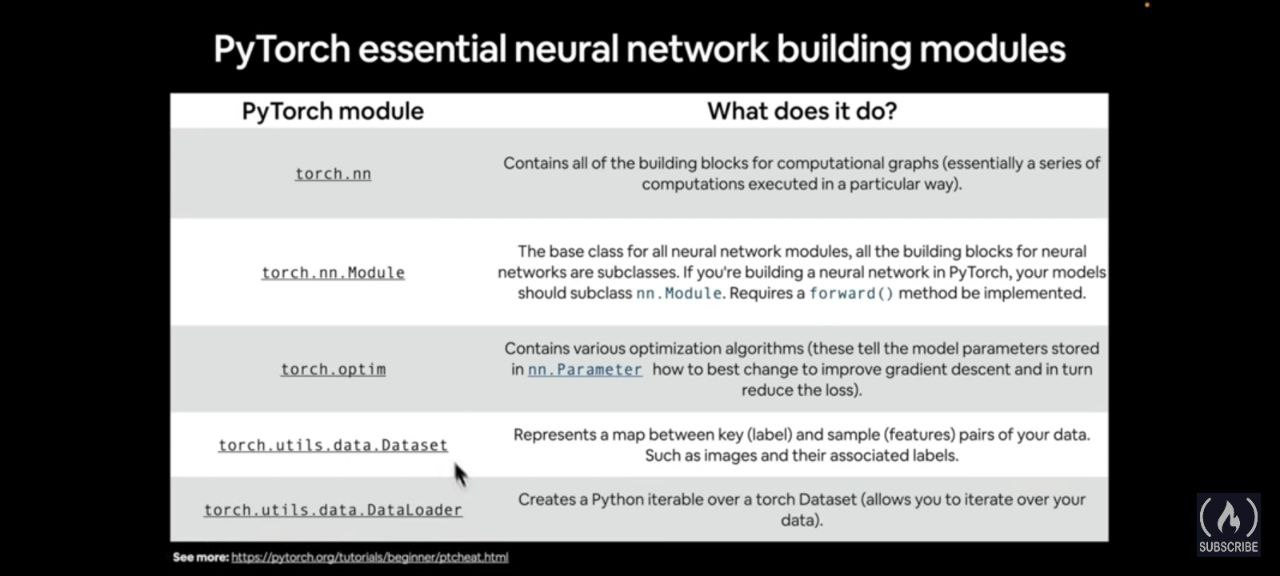

In [131]:
### let us create a model and look into its deepness
torch.manual_seed(35)
model_0 = LinearRegressionModel()
print(list(model_0.parameters()))    ## yahoo i can see the random parameters it has generated......of weight and bias......
print(model_0.state_dict())          ## much sexier

[Parameter containing:
tensor([0.9674], requires_grad=True), Parameter containing:
tensor([0.6711], requires_grad=True)]
OrderedDict([('weights', tensor([0.9674])), ('bias', tensor([0.6711]))])


In [77]:
### i dont want the parameters tensor to change everytime i run the cell as its using torch.rand()
### use torch.manual_seed() for that
torch.manual_seed(35)
torch.randn(1)   ## it value is fixed now
## what is the difference between rand and randn????

tensor([0.9674])

In [78]:
weights,bias  ## these are the original parameter(ideal) and we want to our parameters to go close as possible to them !!

(0.8, 0.4)

In [79]:
test_y

tensor([[1.0400],
        [1.0560],
        [1.0720],
        [1.0880],
        [1.1040],
        [1.1200],
        [1.1360],
        [1.1520],
        [1.1680],
        [1.1840]])

In [80]:
y_predi = model_0(test_x)
y_predi

tensor([[1.4450],
        [1.4644],
        [1.4837],
        [1.5031],
        [1.5224],
        [1.5418],
        [1.5611],
        [1.5805],
        [1.5998],
        [1.6192]], grad_fn=<AddBackward0>)

In [81]:
### lets go to the good part
### inference : we will check the predictability of our model
### we have not trained yet
with torch.inference_mode():
  pred_y = model_0(test_x)
pred_y

tensor([[1.4450],
        [1.4644],
        [1.4837],
        [1.5031],
        [1.5224],
        [1.5418],
        [1.5611],
        [1.5805],
        [1.5998],
        [1.6192]])

In [82]:
with torch.no_grad():
  pred_y = model_0(test_x)
pred_y

tensor([[1.4450],
        [1.4644],
        [1.4837],
        [1.5031],
        [1.5224],
        [1.5418],
        [1.5611],
        [1.5805],
        [1.5998],
        [1.6192]])

so, there is a direct method<br>
and there is a torch.inference_mode()<br>
and there is a torch.no_grad()<br>
the beauty of torch.no_grad() and torch.inference_mode is that it eliminates the tools like backpropagation that is used in training as we are doing inference only we dont need them.
we only need forward pass.....

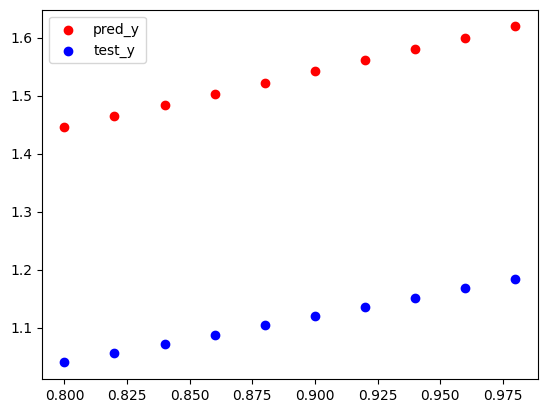

In [83]:
### lets visualise the pred_y and the ideal test_y data !!
plt.scatter(test_x,pred_y,c='r',label="pred_y")
plt.scatter(test_x,test_y,c='b',label="test_y")
plt.legend()

In [142]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.0001)
#### choosed from a variety of options from pytorch documentation.....

In [143]:
%%time
### we have not trained yet thats why its just using the random parameter it generated.
### we have to tune those parameters.
### now lets train!
### one thing to note down  that its not a must to set the parameters as random value ,
### you can also set fixed value like 1 or 0
### or you can use some other model weights (TRANSFER LEARNING!!!!)
epochs = 100
epochs_count  = []
loss_values = []
test_loss_values = []
from torch import nn
import numpy as np
for epoch in range(epochs):
  model_0.train()
  y_pred = model_0(train_x)
  loss = loss_fn(y_pred,train_y)
  loss_values.append(loss)
  print("training loss = ",loss.item())
  print(model_0.state_dict())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_0.eval()
  with torch.inference_mode():
     pred_y_test = model_0(test_x)
     loss_test = loss_fn(pred_y_test,test_y)
     print("test loss = ",loss_test.item())
     test_loss_values.append(loss_test)
     print(model_0.state_dict())
     epochs_count.append(epoch)
#### change the epochs and run the below cell..... 

training loss =  0.3364149034023285
OrderedDict([('weights', tensor([0.9674])), ('bias', tensor([0.6711]))])
test loss =  0.4199734628200531
OrderedDict([('weights', tensor([0.9673])), ('bias', tensor([0.6710]))])
training loss =  0.33629971742630005
OrderedDict([('weights', tensor([0.9673])), ('bias', tensor([0.6710]))])
test loss =  0.41983866691589355
OrderedDict([('weights', tensor([0.9673])), ('bias', tensor([0.6709]))])
training loss =  0.33618447184562683
OrderedDict([('weights', tensor([0.9673])), ('bias', tensor([0.6709]))])
test loss =  0.4197039008140564
OrderedDict([('weights', tensor([0.9673])), ('bias', tensor([0.6708]))])
training loss =  0.336069256067276
OrderedDict([('weights', tensor([0.9673])), ('bias', tensor([0.6708]))])
test loss =  0.4195692539215088
OrderedDict([('weights', tensor([0.9672])), ('bias', tensor([0.6707]))])
training loss =  0.3359540104866028
OrderedDict([('weights', tensor([0.9672])), ('bias', tensor([0.6707]))])
test loss =  0.41943448781967163


In [133]:
epochs_count

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99]

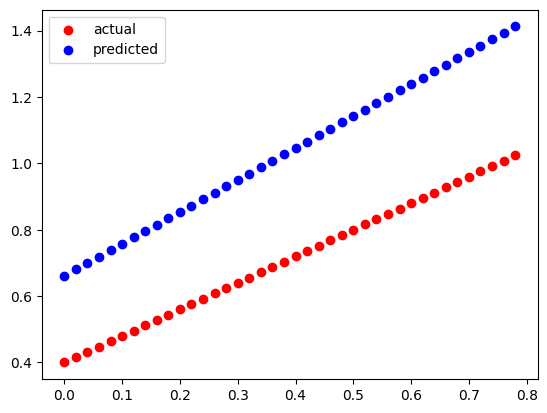

In [144]:
with torch.inference_mode():
  y_prediction = model_0(train_x)
plt.scatter(train_x,train_y,c="r",label="actual")  
plt.scatter(train_x,y_prediction,c="b",label="predicted")
plt.legend()
#### may cause overfit hahahahh!!!!
#### they overlaped each other!!!!

In [135]:
print(model_0.state_dict())   #### it has nearly converged to the ideal value

OrderedDict([('weights', tensor([0.9674])), ('bias', tensor([0.6711]))])


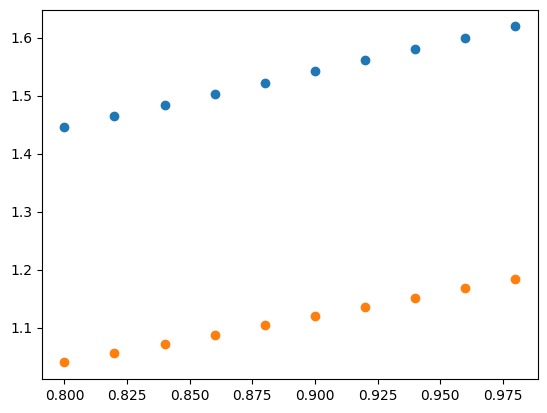

In [136]:
with torch.no_grad():
  predictions = model_0(test_x)
plt.scatter(test_x,predictions) 
plt.scatter(test_x,test_y) 

In [137]:
### solving error is part of a ml engineer life.....!!!!!
predictions,test_y,model_0.state_dict()

(tensor([[1.4450],
         [1.4644],
         [1.4837],
         [1.5031],
         [1.5224],
         [1.5418],
         [1.5611],
         [1.5805],
         [1.5998],
         [1.6192]]),
 tensor([[1.0400],
         [1.0560],
         [1.0720],
         [1.0880],
         [1.1040],
         [1.1200],
         [1.1360],
         [1.1520],
         [1.1680],
         [1.1840]]),
 OrderedDict([('weights', tensor([0.9674])), ('bias', tensor([0.6711]))]))

In [145]:
test_loss_values

[tensor(0.4200),
 tensor(0.4198),
 tensor(0.4197),
 tensor(0.4196),
 tensor(0.4194),
 tensor(0.4193),
 tensor(0.4192),
 tensor(0.4190),
 tensor(0.4189),
 tensor(0.4188),
 tensor(0.4186),
 tensor(0.4185),
 tensor(0.4184),
 tensor(0.4182),
 tensor(0.4181),
 tensor(0.4180),
 tensor(0.4178),
 tensor(0.4177),
 tensor(0.4175),
 tensor(0.4174),
 tensor(0.4173),
 tensor(0.4171),
 tensor(0.4170),
 tensor(0.4169),
 tensor(0.4167),
 tensor(0.4166),
 tensor(0.4165),
 tensor(0.4163),
 tensor(0.4162),
 tensor(0.4161),
 tensor(0.4159),
 tensor(0.4158),
 tensor(0.4157),
 tensor(0.4155),
 tensor(0.4154),
 tensor(0.4153),
 tensor(0.4151),
 tensor(0.4150),
 tensor(0.4149),
 tensor(0.4147),
 tensor(0.4146),
 tensor(0.4145),
 tensor(0.4143),
 tensor(0.4142),
 tensor(0.4140),
 tensor(0.4139),
 tensor(0.4138),
 tensor(0.4136),
 tensor(0.4135),
 tensor(0.4134),
 tensor(0.4132),
 tensor(0.4131),
 tensor(0.4130),
 tensor(0.4128),
 tensor(0.4127),
 tensor(0.4126),
 tensor(0.4124),
 tensor(0.4123),
 tensor(0.4122

Text(0, 0.5, 'loss')

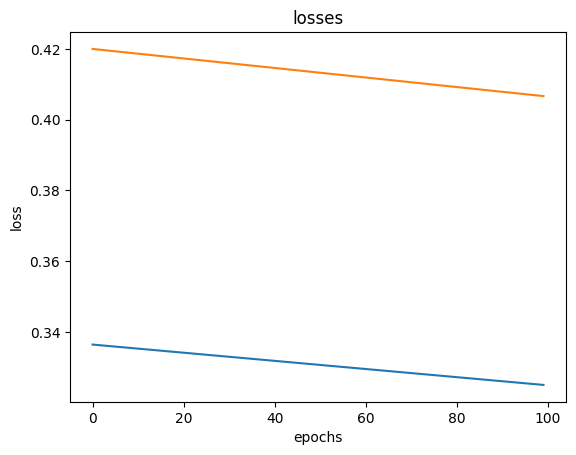

In [146]:
#### plot the loss curves
import numpy as np
plt.plot(epochs_count,np.array(torch.tensor(loss_values).cpu().numpy()))
plt.plot(epochs_count,test_loss_values)
plt.title("losses")
plt.xlabel("epochs")
plt.ylabel("loss")